It is highly recommended to use a powerful **GPU**, you can use it for free uploading this notebook to [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).
<table align="center">
 <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ezponda/intro_deep_learning/blob/main/class/Fundamentals/IMBD_sentiment_binary_classification.ipynb">
        <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/ezponda/intro_deep_learning/blob/main/class/Fundamentals/IMBD_sentiment_binary_classification.ipynb">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  height="70px" style="padding-bottom:5px;"  />View Source on GitHub</a></td>
</table>

# Classification Example
 Two-class classification, or binary classification, may be the most widely applied kind of machine-learning problem. In this example, you’ll learn to classify movie reviews as positive or negative, based on the text content of the reviews.


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

## The Dataset: The IMDB dataset
We’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews. The  parameter `num_words` controls how many words different we want to use.

In [2]:
from tensorflow.keras.datasets import imdb
num_words = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)
print(train_data[0])

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/aezponda/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


/Users/aezponda/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
# Transform word_id to word and reverse
word2int = imdb.get_word_index()
word2int = {w: i+3 for w, i in word2int.items()}
word2int["<PAD>"] = 0
word2int["<START>"] = 1
word2int["<UNK>"] = 2
word2int["<UNUSED>"] = 3
int2word = {i: w for w, i in word2int.items()}
num_words = num_words+3

For transforming an id-sequence to a phrase use get_words

In [4]:
def get_words(sentence, int2word):
    return ' '.join([int2word.get(i,'<UNK>') for i in sentence])
print(get_words(train_data[0], int2word))
print('Sentiment: ', train_labels[0])

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

## Data Preprocessing

You need to convert your raw text to an appropriate input to a sequential model 

In [5]:
def vectorize_text_sentence(text, word2int):
    tokens = text.split(' ')
    tokens_id = [word2int.get(tk,2) for tk in tokens]
    return tokens_id

text = get_words(train_data[0], int2word)
print(text)
print(vectorize_text_sentence(text, word2int))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

### Bag of Words Model BoW
We are going to use a bag of words model. BoW is a simplifying representation used in natural language processing. In this model, a text (such as a sentence or a document) is represented as the Each key is the word, and each value is the frequency of occurrences of that word in the given text document.

- **Input document**: `"John likes to watch movies Mary likes movies too"`
- **BoW**: `{'John': 1, 'likes': 2, 'to': 1, 'watch': 1, 'movies': 2, 'Mary': 1, 'too': 1}`
- **BoW Normalized**: `{'John': 0.11, 'likes': 0.22, 'to': 0.11, 'watch': 0.11, 'movies': 0.22, 'Mary': 0.11, 'too': 0.11}`


In [6]:
from collections import Counter

def get_bag_of_words(sequence, norm=True):
    word_count = Counter(sequence)
    if norm:
        total = sum(word_count.values())
        word_freq = {w: n / total for w, n in word_count.items()}
        return word_freq
    else:
        return dict(word_count.items())

text_example = "John likes to watch movies Mary likes movies too"
print('text_example', text_example)
text_sequence = text_example.split()
print('text splitted', text_sequence)
bag_of_words = get_bag_of_words(text_sequence)
print('bag_of_words', bag_of_words)
print('bag_of_words norm=False', get_bag_of_words(text_sequence, norm=False))
print(
    'bag_of_words with indexes', {
        word2int[w.lower()]: p
        for w, p in get_bag_of_words(text_sequence, norm=False).items()
    })

text_example John likes to watch movies Mary likes movies too
text splitted ['John', 'likes', 'to', 'watch', 'movies', 'Mary', 'likes', 'movies', 'too']
bag_of_words {'John': 0.1111111111111111, 'likes': 0.2222222222222222, 'to': 0.1111111111111111, 'watch': 0.1111111111111111, 'movies': 0.2222222222222222, 'Mary': 0.1111111111111111, 'too': 0.1111111111111111}
bag_of_words norm=False {'John': 1, 'likes': 2, 'to': 1, 'watch': 1, 'movies': 2, 'Mary': 1, 'too': 1}
bag_of_words with indexes {308: 1, 1232: 2, 8: 1, 106: 1, 102: 2, 1083: 1, 99: 1}


### Document Term Matrix

We need a way to model the documents so that they are all the same length, so that we can use a neural network. For this we are going to use the document term matrix.
- Every document is a vector with the dimension of the vocabulary.
- The position i of the vector corresponds to the word with index i.
- The vector is all zeros except for the BoW word positions, which are filled with the frequency of the corresponding word.


For example:

- D1 = "I like movies",  `{'I': 1, 'like': 1, 'movies': 1}`

- D2 = "I dislike movies",  `{'I': 1, 'dislike': 1, 'movies': 1}`

Then the document-term matrix would be:



   | Doc| I  | like    | dislike   | movies   |
|---:|:-------------|:-----------|:------|:------|
| D1 | 1  | 1       | 0   | 1     |
| D2 | 1  | 0    | 1   | 1     |

$D1 = [1,1,0,1]$

$D2 = [1,0,1,1]$

We convert every BoW to a vector of `dim=num_words` with `vectorize_sequences`

In [7]:
def vectorize_sequence(sequence, num_words, norm=True):
    vec = np.zeros(num_words)
    bow = get_bag_of_words(sequence, norm)
    for w, freq in bow.items():
        if w < num_words:
            vec[w] = freq
    return vec


def vectorize_sequences(sequences, num_words=num_words, norm=True):
    """Creates an all-zero matrix of shape (len(sequences), num_words)"""
    results = np.zeros((len(sequences), num_words))
    for i, sequence in enumerate(sequences):
        results[i, :] = vectorize_sequence(sequence, num_words, norm)
    return results


x_train = vectorize_sequences(train_data, num_words=num_words)
x_test = vectorize_sequences(test_data, num_words=num_words)
y_train =np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
x_train.shape, y_train.shape

((25000, 10003), (25000,))

## Define and train a model 

Define, compile and fit your NN model

1. You can use the [Functional API](https://keras.io/guides/functional_api/):

You need to start with an input data entry:
```python    
    inputs = keras.Input(shape=(8,))
    layer_1 = layers.Dense(...)(inputs)
```

and the network outputs:
```python
outputs = layers.Dense(...)(previous_layer)
model = keras.Model(inputs=inputs, outputs=outputs)
```

2. Or you can use [Sequential API](https://keras.io/guides/sequential_model/)

```python
model = keras.Sequential(name='example_model')
model.add(layers.Dense(..., input_shape=(8,))
model.add(...
```

First try with only one hidden layer and see the results.

In [8]:
# model = ...

In [9]:
inputs = tf.keras.Input(shape=(num_words,), name='input_layer')  # entrada

l_1 = layers.Dense(128, activation='relu')(inputs)
l_1 = layers.Dropout(0.35)(l_1)

l_2 = layers.Dense(64, activation='relu')(l_1)
l_2 = layers.Dropout(0.35)(l_2)

outputs = layers.Dense(1, activation='sigmoid')(l_2)
# Model definition
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=2,
                                            verbose=1)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train,
                    y_train,
                    validation_split=0.25,
                    epochs=4,
                    batch_size=32,
                    callbacks=[es_callback])

Epoch 1/4
586/586 [==============================] - 6s 9ms/step - loss: 0.5975 - accuracy: 0.6755 - val_loss: 0.2964 - val_accuracy: 0.8800
Epoch 2/4
586/586 [==============================] - 5s 8ms/step - loss: 0.2614 - accuracy: 0.8988 - val_loss: 0.2576 - val_accuracy: 0.8974
Epoch 3/4
586/586 [==============================] - 3s 6ms/step - loss: 0.1850 - accuracy: 0.9330 - val_loss: 0.2608 - val_accuracy: 0.8939
Epoch 4/4
586/586 [==============================] - 3s 6ms/step - loss: 0.1492 - accuracy: 0.9482 - val_loss: 0.2788 - val_accuracy: 0.8920
Epoch 00004: early stopping


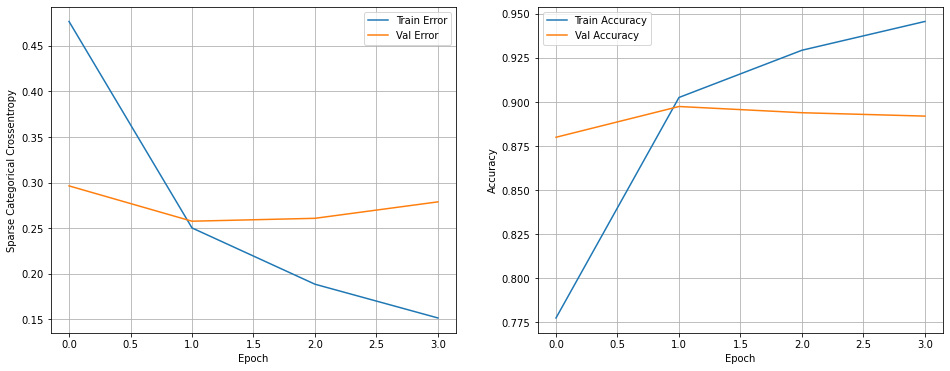

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
def show_loss_accuracy_evolution(hist):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Sparse Categorical Crossentropy')
    ax1.plot(hist['epoch'], hist['loss'], label='Train Error')
    ax1.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    ax1.grid()
    ax1.legend()

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    ax2.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()
    
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
show_loss_accuracy_evolution(hist)

### Evaluate the model
You need to obtain a Test Accuracy > 0.85. Try to get more than 0.9!

In [12]:
results = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

782/782 [==============================] - 3s 3ms/step - loss: 0.3133 - accuracy: 0.8777
Test Loss: 0.31329718232154846
Test Accuracy: 0.8776800036430359


In [13]:
def show_errors(x_test, model, labels, int2word, n_samples=10):
    preds = 1.0 * (model.predict(x_test).flatten() > 0.5)
    bad_pred_inds = np.where(preds != labels)[0]
    n_samples = min(len(bad_pred_inds), n_samples)
    samples_inds = np.random.choice(bad_pred_inds, n_samples)
    for ind in samples_inds:
        print('Predicted : {0}, real : {1}, lenght: {2}'.format(
            int(preds[ind]), labels[ind], len(test_data[ind])))
        print(get_words(test_data[ind], int2word))
        print()
    return

show_errors(x_test, model, y_test, int2word, n_samples=10)

Predicted : 0, real : 1.0, lenght: 127
<START> i this on turner classic just because it was pre code and sounded interesting when i got around to watching i noticed that the critique gave it one and a half stars on a four star scale i started watching with <UNK> even old movies can be bad movies but i quickly got engaged in the story and mary performance as the business brains behind a simple <UNK> rise to success not a truly great movie too predictable but certainly better than advertised and i would have liked to have seen more of <UNK> cortez as the man who <UNK> mary but won't give up his wealthy wife i'd recommend giving it a look just to appreciate <UNK> and what a long way we've come baby

Predicted : 0, real : 1.0, lenght: 121
<START> how is it possible to like and dislike the same movie br br the plot is very much like that <UNK> foster thing only not as good nicole was great jude was adequate they didn't give him many lines is there a reason for that generally he's a pretty g

### Making predictioins with new data

In [14]:
reviews = ['the film was really bad and i am very disappointed',
           'The film was very funny entertaining and good we had a great time . brilliant film',
           'this film was just brilliant',
           'the movie is not bad',
           'the movie is not bad I like it'
]
sequences = [vectorize_text_sentence(review.lower(), word2int)
             for review in reviews]

x_pred = vectorize_sequences(sequences, num_words=num_words)
predictions = model.predict(x_pred)
for review, pred in zip(reviews, predictions.flatten()):
    print()
    print(review)
    print('Sentiment: ', np.round(pred, 2))


the film was really bad and i am very disappointed
Sentiment:  0.0

The film was very funny entertaining and good we had a great time . brilliant film
Sentiment:  1.0

this film was just brilliant
Sentiment:  1.0

the movie is not bad
Sentiment:  0.0

the movie is not bad I like it
Sentiment:  0.01


In [15]:
1.0*(model.predict(x_pred) > 0.5)

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.]])

### Question 1: Repeat the process with unnormalized bag of words, compare results

In [16]:
x_train = vectorize_sequences(train_data, num_words=num_words, norm=False)
x_test = vectorize_sequences(test_data, num_words=num_words, norm=False)
y_train =np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
x_train.shape, y_train.shape

((25000, 10003), (25000,))

In [17]:
inputs = tf.keras.Input(shape=(num_words,), name='input_layer')  # entrada

l_1 = layers.Dense(128, activation='relu')(inputs)
l_1 = layers.Dropout(0.35)(l_1)

l_2 = layers.Dense(64, activation='relu')(l_1)
l_2 = layers.Dropout(0.35)(l_2)

outputs = layers.Dense(1, activation='sigmoid')(l_2)
# Model definition
model = keras.Model(inputs=inputs, outputs=outputs)

In [18]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=2,
                                            verbose=1)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train,
                    y_train,
                    validation_split=0.25,
                    epochs=4,
                    batch_size=32,
                    callbacks=[es_callback])

Epoch 1/4
586/586 [==============================] - 5s 7ms/step - loss: 0.4856 - accuracy: 0.7616 - val_loss: 0.2861 - val_accuracy: 0.8882
Epoch 2/4
586/586 [==============================] - 4s 7ms/step - loss: 0.2131 - accuracy: 0.9208 - val_loss: 0.2770 - val_accuracy: 0.8904
Epoch 3/4
586/586 [==============================] - 3s 6ms/step - loss: 0.1367 - accuracy: 0.9511 - val_loss: 0.2995 - val_accuracy: 0.8888
Epoch 4/4
586/586 [==============================] - 3s 6ms/step - loss: 0.0810 - accuracy: 0.9714 - val_loss: 0.4009 - val_accuracy: 0.8803
Epoch 00004: early stopping


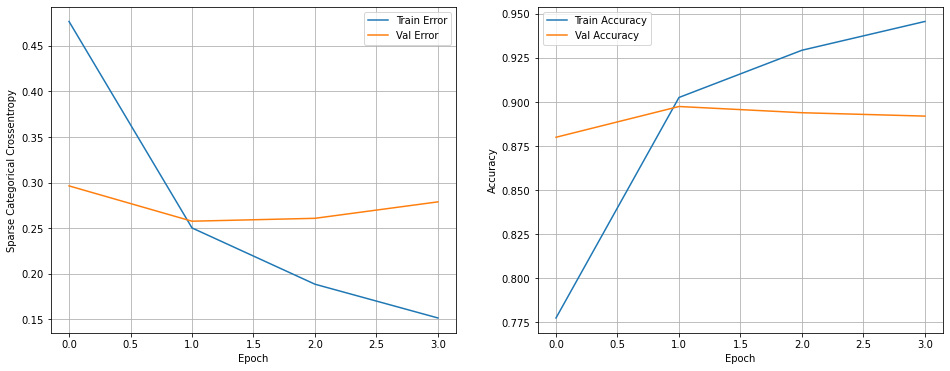

782/782 [==============================] - 2s 2ms/step - loss: 0.4537 - accuracy: 0.8683
Test Loss: 0.4537387788295746
Test Accuracy: 0.8683199882507324


In [19]:
show_loss_accuracy_evolution(hist)
results = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

### Question 2: What happens if you reduce the size of the vocabulary `num_words`, compare results

In [20]:
num_words = 6000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)
print(train_data[0])

word2int = imdb.get_word_index()
word2int = {w: i+3 for w, i in word2int.items()}
word2int["<PAD>"] = 0
word2int["<START>"] = 1
word2int["<UNK>"] = 2
word2int["<UNUSED>"] = 3
int2word = {i: w for w, i in word2int.items()}
num_words = num_words+3

x_train = vectorize_sequences(train_data, num_words=num_words)
x_test = vectorize_sequences(test_data, num_words=num_words)
y_train =np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
x_train.shape, y_train.shape

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/aezponda/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/aezponda/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shape

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


((25000, 6003), (25000,))

In [21]:
inputs = tf.keras.Input(shape=(num_words,), name='input_layer')  # entrada

l_1 = layers.Dense(128, activation='relu')(inputs)
l_1 = layers.Dropout(0.35)(l_1)

l_2 = layers.Dense(64, activation='relu')(l_1)
l_2 = layers.Dropout(0.35)(l_2)

outputs = layers.Dense(1, activation='sigmoid')(l_2)
# Model definition
model = keras.Model(inputs=inputs, outputs=outputs)

In [22]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=2,
                                            verbose=1)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train,
                    y_train,
                    validation_split=0.25,
                    epochs=4,
                    batch_size=32,
                    callbacks=[es_callback])

Epoch 1/4
586/586 [==============================] - 3s 4ms/step - loss: 0.5996 - accuracy: 0.6757 - val_loss: 0.2976 - val_accuracy: 0.8816
Epoch 2/4
586/586 [==============================] - 2s 4ms/step - loss: 0.2698 - accuracy: 0.8935 - val_loss: 0.2691 - val_accuracy: 0.8899
Epoch 3/4
586/586 [==============================] - 2s 4ms/step - loss: 0.2128 - accuracy: 0.9214 - val_loss: 0.2671 - val_accuracy: 0.8914
Epoch 4/4
586/586 [==============================] - 2s 4ms/step - loss: 0.1833 - accuracy: 0.9353 - val_loss: 0.2758 - val_accuracy: 0.8890


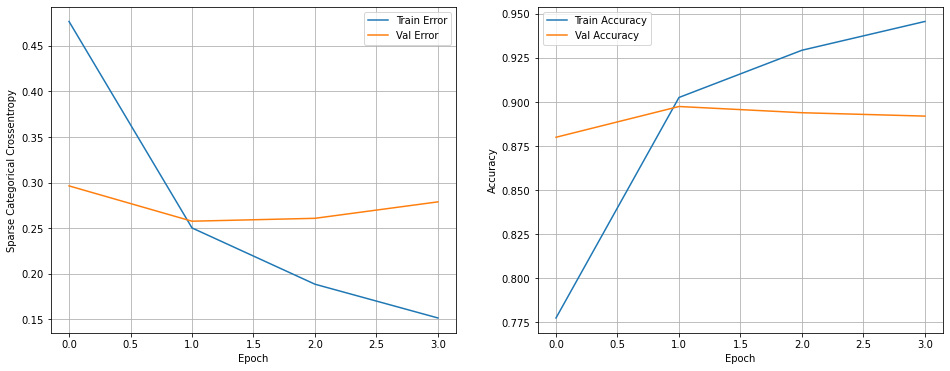

782/782 [==============================] - 1s 2ms/step - loss: 0.2923 - accuracy: 0.8850
Test Loss: 0.29229381680488586
Test Accuracy: 0.8849999904632568


In [23]:
show_loss_accuracy_evolution(hist)
results = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

In [24]:
reviews = [
    'the film was really bad and i am very disappointed',
    'The film was very funny entertaining and good we had a great time . brilliant film',
    'this film was just brilliant', 'the movie is not bad',
    'the movie is not bad I like it'
]
sequences = [
    vectorize_text_sentence(review.lower(), word2int) for review in reviews
]

x_pred = vectorize_sequences(sequences, num_words=num_words)
predictions = model.predict(x_pred)
for review, pred in zip(reviews, predictions.flatten()):
    print()
    print(review)
    print('Sentiment: ', np.round(pred, 2))


the film was really bad and i am very disappointed
Sentiment:  0.0

The film was very funny entertaining and good we had a great time . brilliant film
Sentiment:  1.0

this film was just brilliant
Sentiment:  1.0

the movie is not bad
Sentiment:  0.0

the movie is not bad I like it
Sentiment:  0.0


### Compare with other ML algorithms

In [25]:
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression()
clr.fit(x_train, y_train)
val_acc = clr.score(x_test, y_test)
print('Test Accuracy: {}'.format(val_acc))

Test Accuracy: 0.72136


In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5, n_jobs=-1)
rfc.fit(x_train, y_train)
val_acc = rfc.score(x_test, y_test)
print('Test Accuracy: {}'.format(val_acc))

Test Accuracy: 0.81172


In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1)
rfc.fit(x_train, y_train)
val_acc = rfc.score(x_test, y_test)
print('Test Accuracy: {}'.format(val_acc))

Test Accuracy: 0.84352


In [28]:
reviews = []
# training reviews
for ind in range(len(train_data)):
    sentence = train_data[ind]
    sentence_text = get_words(train_data[ind], int2word)
    reviews.append(sentence_text)
print('First training review: ', reviews[0])

First training review:  <START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big <UNK> for the whole film but these children are amazing and sho